## **Import Libraries**

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 10)

## **Load  Data**

In [62]:
df = pd.read_csv('ECommerce_consumer behaviour.csv')
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [63]:
df.shape

(2019501, 12)

## **Data Cleaning**

In [65]:
df.isna().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [66]:
df.dropna(inplace = True)
df.shape

(1895159, 12)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1895159 entries, 22 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 188.0+ MB


In [68]:
df['days_since_prior_order'] = df['days_since_prior_order'].astype('Int64')

In [69]:
#drop less important columns
df = df.drop(columns = ['order_id', 'department_id', 'order_number', 'product_id']).reset_index()
df.head()

,index,user_id,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,department,product_name
0,22,147243,0,16,3,1,0,beverages,tea
1,23,147243,0,16,3,2,0,produce,fresh vegetables
2,24,147243,0,16,3,3,1,produce,fresh vegetables
3,25,147243,0,16,3,4,1,produce,fresh fruits
4,26,147243,0,16,3,5,1,dairy eggs,yogurt


## **Exploratory Data Analysis**

In [71]:
#descriptive statistics
df.describe()

,index,user_id,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
count,1.895159e+06,1.895159e+06,1.895159e+06,1.895159e+06,1895159.0,1.895159e+06,1.895159e+06
mean,1.010192e+06,1.030471e+05,2.735071e+00,1.342840e+01,11.386035,8.365059e+00,6.284359e-01
std,5.826880e+05,5.946256e+04,2.092352e+00,4.243730e+00,8.97098,7.158381e+00,4.832229e-01
min,2.200000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,0.000000e+00
25%,5.059395e+05,5.162500e+04,1.000000e+00,1.000000e+01,5.0,3.000000e+00,0.000000e+00
50%,1.010065e+06,1.026170e+05,3.000000e+00,1.300000e+01,8.0,6.000000e+00,1.000000e+00
75%,1.514886e+06,1.545240e+05,5.000000e+00,1.600000e+01,15.0,1.100000e+01,1.000000e+00
max,2.019500e+06,2.062090e+05,6.000000e+00,2.300000e+01,30.0,1.370000e+02,1.000000e+00


## **Univariate Analysis**

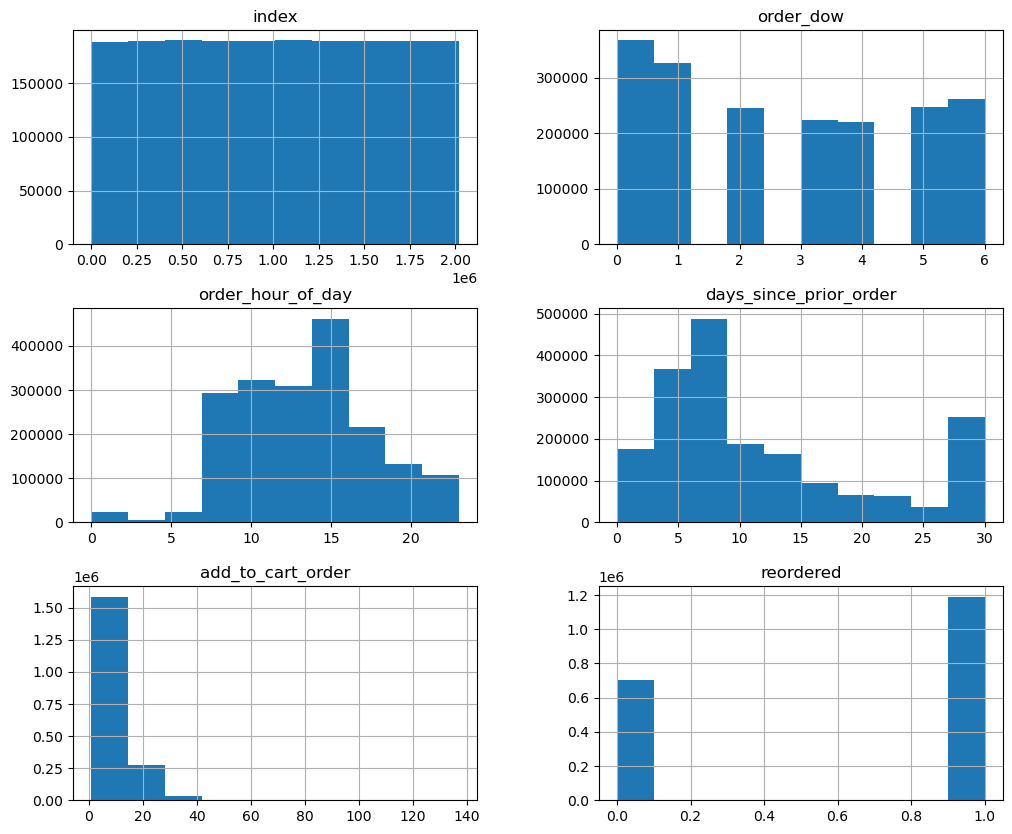

In [73]:
#variable distribution
df = df.drop(columns = 'user_id')
df.hist();

### **Bivariate Analysis**

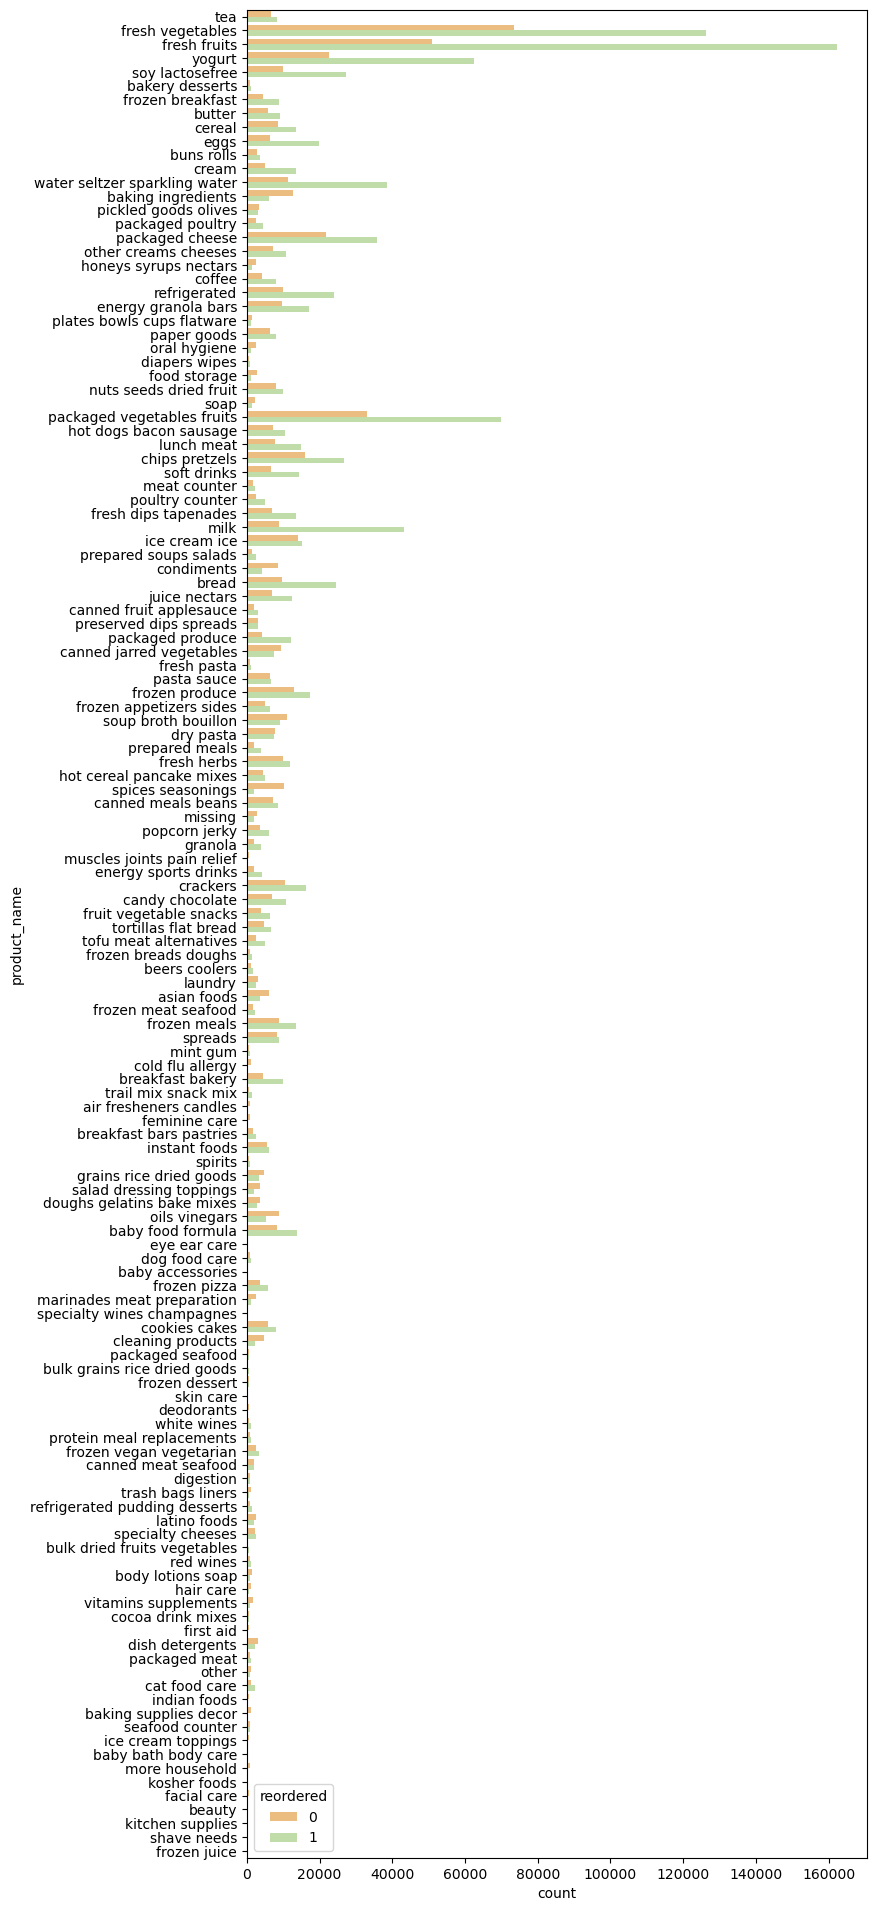

In [75]:
plt.figure(figsize = (8, 24))
sns.countplot(data = df, y= 'product_name', orient = 'h', hue = 'reordered', palette = 'Spectral');


<Axes: ylabel='product_name'>

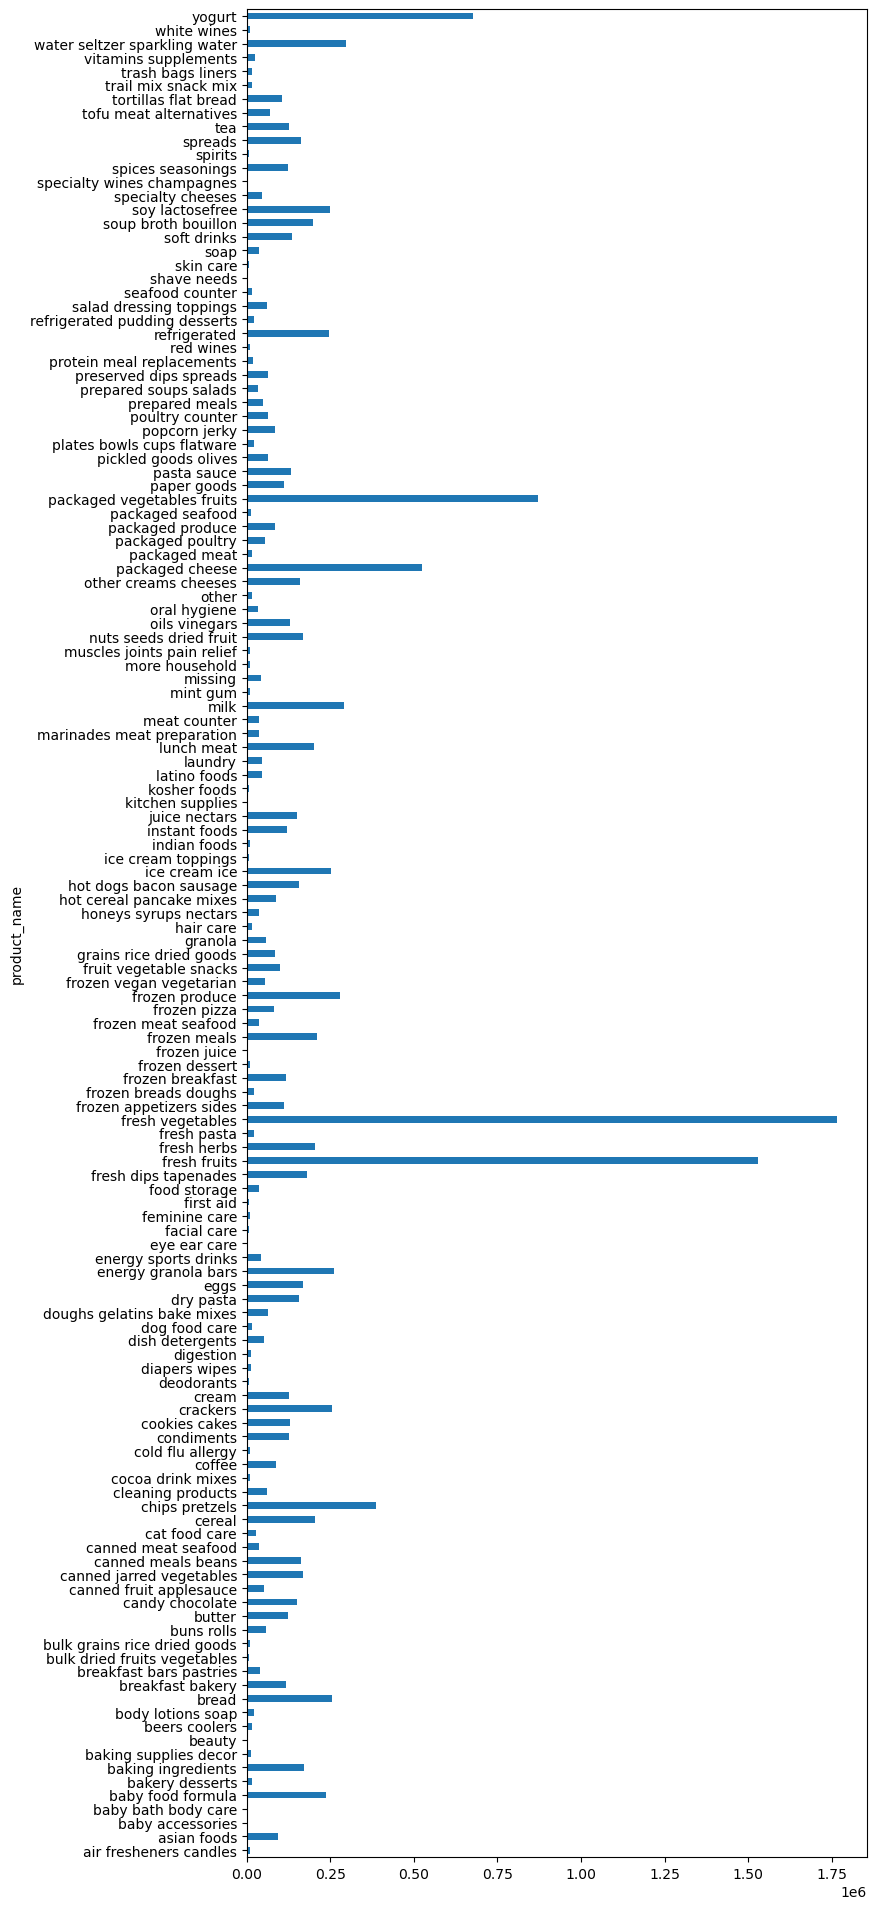

In [76]:
plt.figure(figsize = (8, 24))
df.groupby('product_name')['add_to_cart_order'].sum().plot(kind = 'barh')

In [77]:
#correlation 
corr = df.select_dtypes(exclude = 'object').corr()


<Axes: >

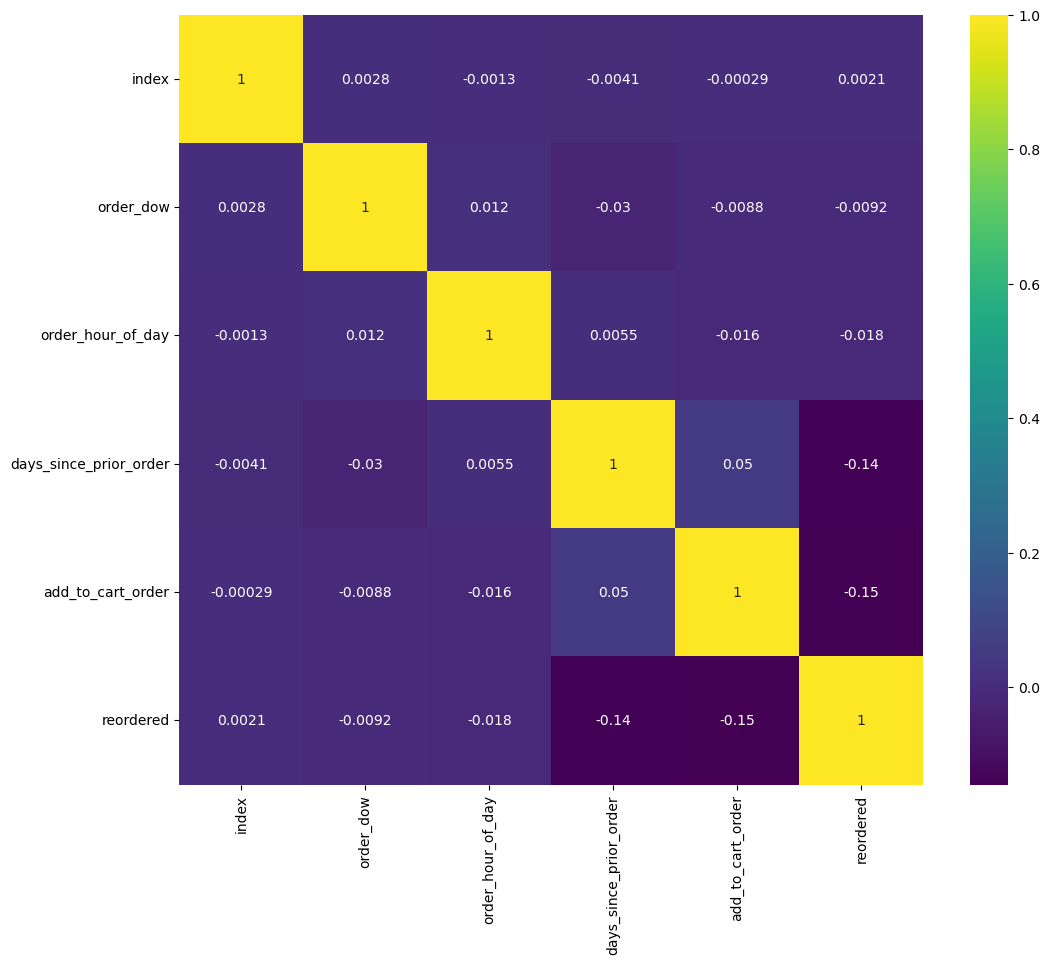

In [78]:
sns.heatmap(corr, annot = True, cmap = 'viridis')

## **Cluster Model**

### **Univariate clustering**

In [81]:
#import StandardScaler, OneHotEncoder and  K Means model 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans 

In [101]:
#instantiate the model
clustering1 = KMeans(n_clusters = 3)

#fit the model
clustering1.fit(df[['add_to_cart_order']])

clustering1.inertia_

18233875.2877764

In [114]:
clustering1.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
#add cluster column
df['add_to_cart'] = clustering1.labels_
df.head()

,index,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,department,product_name,add_to_cart
0,22,0,16,3,1,0,beverages,tea,0
1,23,0,16,3,2,0,produce,fresh vegetables,0
2,24,0,16,3,3,1,produce,fresh vegetables,0
3,25,0,16,3,4,1,produce,fresh fruits,0
4,26,0,16,3,5,1,dairy eggs,yogurt,0


In [116]:
df['add_to_cart'].value_counts(normalize = True)

add_to_cart
0    0.622837
2    0.299575
1    0.077588
Name: proportion, dtype: float64

In [105]:
#optimise the cluster
inertia_scores1 = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['add_to_cart_order']])
    inertia_scores1.append(kmeans.inertia_)


Text(0, 0.5, 'Inertia Scores')

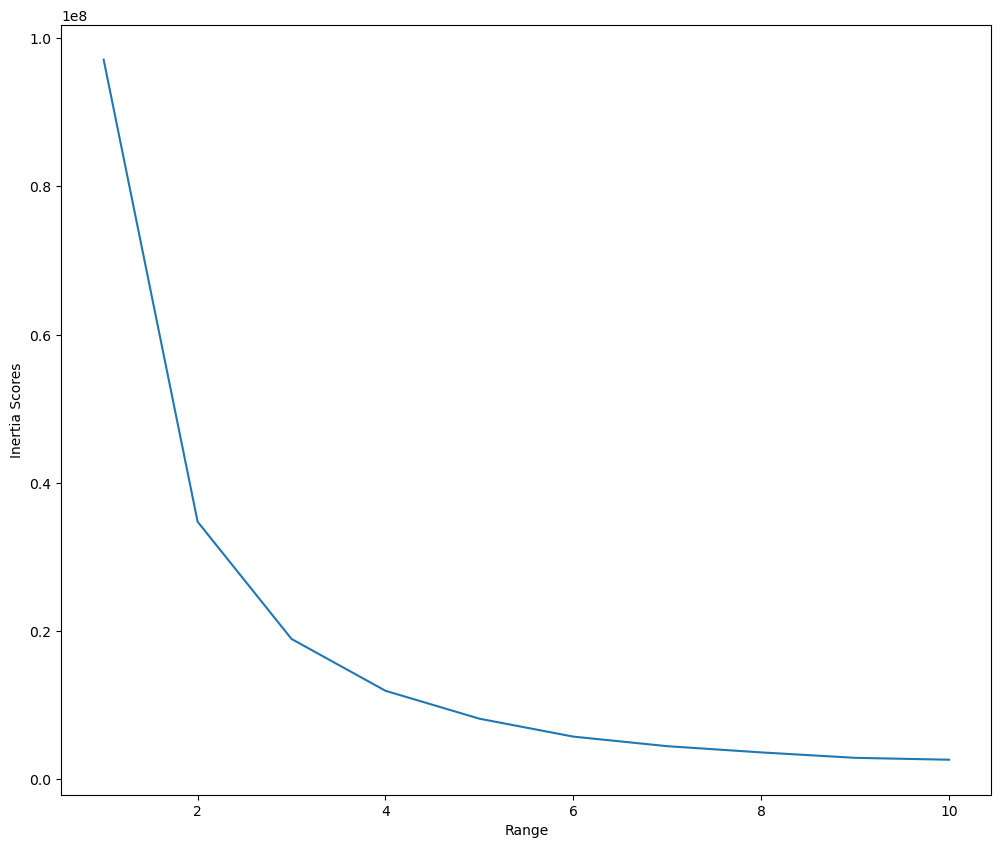

In [106]:
#plot
plt.plot(range(1,11), inertia_scores1)
plt.xlabel('Range')
plt.ylabel('Inertia Scores')

In [112]:
#Univariate Analysis
df.groupby('add_to_cart')[['order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered']].mean()

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
add_to_cart,,,,,
0,2.753065,13.470313,11.066792,4.061964,0.677697
1,2.712135,13.241348,12.441673,26.103699,0.484511
2,2.703602,13.389706,11.776358,12.717307,0.563294


### **Bivariate clustering**

In [142]:
#instantiate the model
clustering2  = KMeans(n_clusters = 3)

#fit the model
clustering2.fit(df[['add_to_cart_order', 'days_since_prior_order']])

clustering2.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [143]:
# optimise the cluster
inertia_scores2 = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters= i)
    kmeans2.fit(df[['add_to_cart_order', 'days_since_prior_order']])
    inertia_scores2.append(kmeans2.inertia_)
    

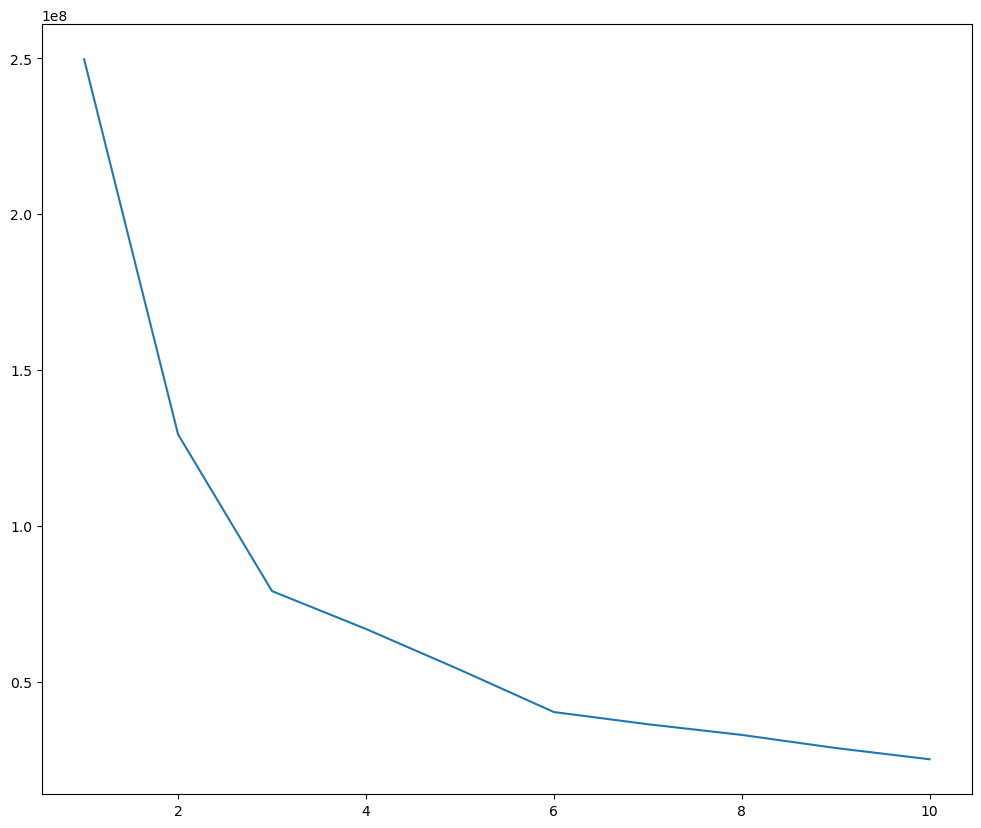

In [144]:
#plot
plt.plot(range(1, 11), inertia_scores2)

In [151]:
df['add_cart_prior_orders'] = clustering2.labels_
df.head()

,index,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,department,product_name,add_to_cart,add_cart_prior_orders
0,22,0,16,3,1,0,beverages,tea,0,1
1,23,0,16,3,2,0,produce,fresh vegetables,0,1
2,24,0,16,3,3,1,produce,fresh vegetables,0,1
3,25,0,16,3,4,1,produce,fresh fruits,0,1
4,26,0,16,3,5,1,dairy eggs,yogurt,0,1


In [153]:
df['add_cart_prior_orders'].value_counts(normalize = True)

add_cart_prior_orders
1    0.610239
2    0.215894
0    0.173867
Name: proportion, dtype: float64

In [157]:
df.groupby('add_cart_prior_orders')[['order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered']].mean()

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
add_cart_prior_orders,,,,,
0,2.708827,13.274858,8.991463,19.767494,0.548149
1,2.762049,13.427905,6.796792,5.359601,0.689017
2,2.679952,13.553454,26.286249,7.677427,0.521857


In [84]:
#instantiate StandardScaler
scaler = StandardScaler()
#fit the scaler
df[['user_id', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order',
       'reordered']]  = scaler.fit_transform(df[['user_id','order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order',
       'reordered']])

KeyError: "['user_id'] not in index"

In [ ]:
#instantiate the OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')
#fit the model
encoded = ohe.fit_transform(df[['department','product_name']])
encoded.head()


In [ ]:
#concat df
df = pd.concat([df, encoded], axis = 1).drop(columns = ['department', 'product_name'])

df.head()

In [ ]:
cluster = KMeans()
cluster.fit(df[['user_id']])
cluster.inertia_
print(cluster.labels_)

In [ ]:
df['user_id_cluster'] = cluster.labels_
df.head()

In [ ]:
df['user_id_cluster'].value_counts(normalize = True)

In [ ]:

sse = []

for i in range(1,11):
    cluster1 = KMeans(n_clusters = i)
    cluster1.fit(df[['user_id']])
    cluster1.inertia_
    sse.append(cluster1.inertia_)

In [ ]:
sse

In [ ]:
plt.plot(range(1,11), sse)